### Summary

In this notebook, we have a deeper look at the data, and start to build models step by step.

In [1]:
import pandas as pd
import numpy as np


In [2]:
train_data = pd.read_csv('../processed_input/train_data.csv')
validation_data = pd.read_csv('../processed_input/validation_data.csv')
test_data = pd.read_csv('../processed_input/test_data.csv')

monthly_train_data = pd.read_csv('../processed_input/monthly_train_data.csv')
monthly_train_data_avg = pd.read_csv('../processed_input/monthly_train_data_avg.csv')

monthly_validation_data = pd.read_csv('../processed_input/monthly_validation_data.csv')
monthly_test_data = pd.read_csv('../processed_input/monthly_test_data.csv')

In [3]:
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


##### Let us start with doing some visualizations on some sets of shop_id, item_id pairs

In [4]:
train_data[(train_data['shop_id'] == 25) & (train_data['item_id'] == 2555)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
4,15.01.2013,0,25,2555,1099.0,1.0
156152,22.02.2013,1,25,2555,1099.0,1.0
324218,11.03.2013,2,25,2555,1099.0,1.0
354219,05.04.2013,3,25,2555,1099.0,1.0
354220,16.04.2013,3,25,2555,1099.0,1.0
354221,26.04.2013,3,25,2555,1099.0,1.0
354222,28.04.2013,3,25,2555,1099.0,1.0
586055,23.06.2013,5,25,2555,1099.0,1.0
794531,02.08.2013,7,25,2555,1099.0,1.0
1141724,30.12.2013,11,25,2555,1149.0,1.0


##### Let us check out the most frequent shop_id,item_id combinations.

In [5]:
shop_id_item_id_groups = train_data[['shop_id', 'item_id', 'date']].groupby(['shop_id', 'item_id']).count()

In [6]:
shop_id_item_id_groups.reset_index(['shop_id', 'item_id'], inplace=True)

In [7]:
shop_id_item_id_groups.rename(columns={'date':'count'}, inplace=True)

In [8]:
shop_id_item_id_groups.sort_values(by=['count'], inplace=True, ascending=False)

In [9]:
shop_id_item_id_groups

,shop_id,item_id,count
357765,53,20949,814
192775,28,20949,808
223830,31,20949,802
135298,22,20949,797
94194,16,20949,779
384066,56,20949,775
278319,42,20949,773
48857,7,20949,772
239882,35,20949,768
127550,21,20949,766


##### Let us take a deeper look at those very frequent cases.

In [24]:
specific_df = train_data[(train_data['shop_id'] == 53) & (train_data['item_id'] == 20949)].sort_values(by=['date'])
specific_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1426765,01.02.2014,13,53,20949,5.0,5.0
2445600,01.02.2015,25,53,20949,5.0,1.0
1461828,01.03.2014,14,53,20949,5.0,11.0
2517520,01.03.2015,26,53,20949,5.0,4.0
1553875,01.04.2014,15,53,20949,5.0,4.0


##### Let us plot it and see how it looks !

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 0, 'TEST')

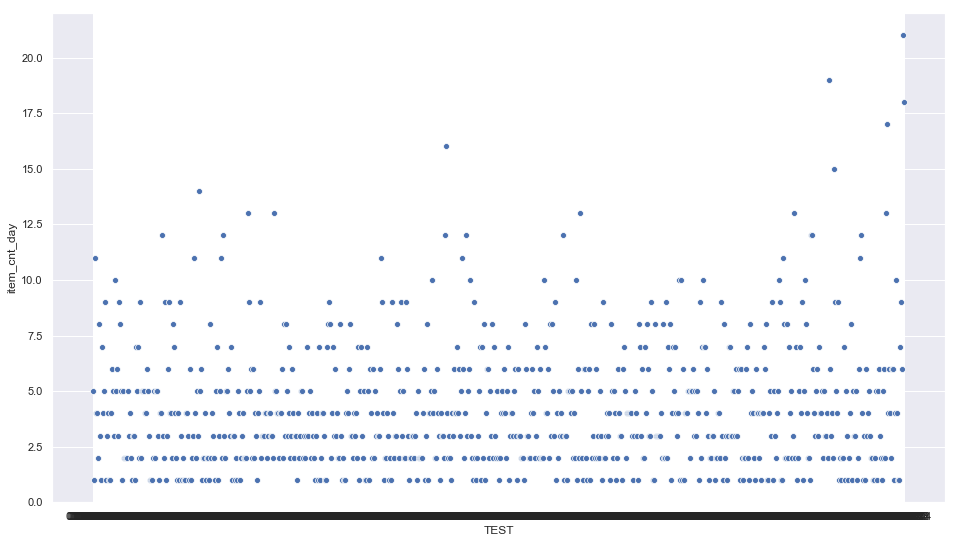

In [23]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day', 
                data=specific_df,
                ax=ax)


##### Let us have some more plots

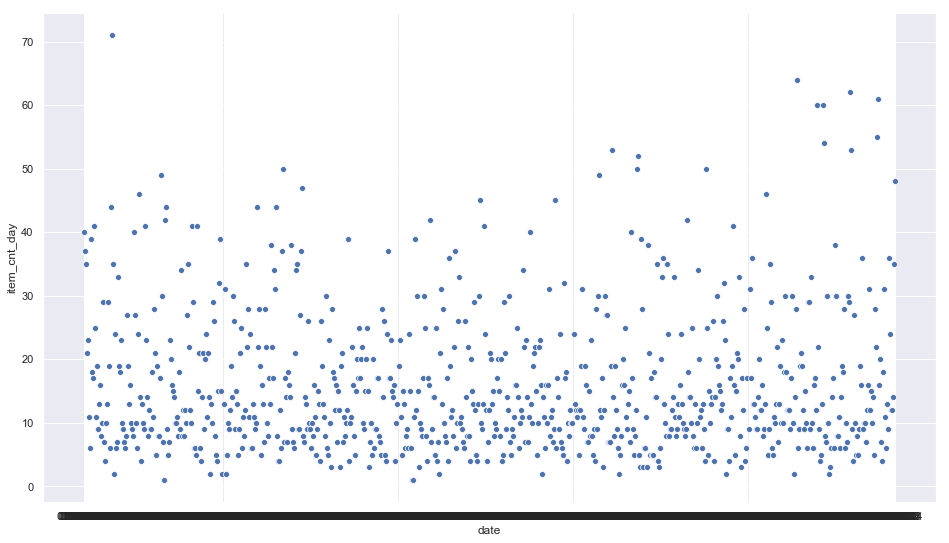

In [25]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day', 
                data=train_data[(train_data['shop_id'] == 28) & (train_data['item_id'] == 20949)].sort_values(by=['date']),
                ax=ax)



##### It looks like 20949 is a product in high demand. Let us check as to what it is !!

In [30]:
items = pd.read_csv("../input/items.csv")

In [31]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [32]:
items[(items['item_id'] == 20949)]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


##### Let us check out some cases apart from item 20949

In [35]:
shop_id_item_id_groups[(shop_id_item_id_groups['item_id'] != 20949)].head()

,shop_id,item_id,count
372088,55,492,747
62013,12,11370,583
213499,31,5822,570
78705,15,4181,452
221584,31,17717,430


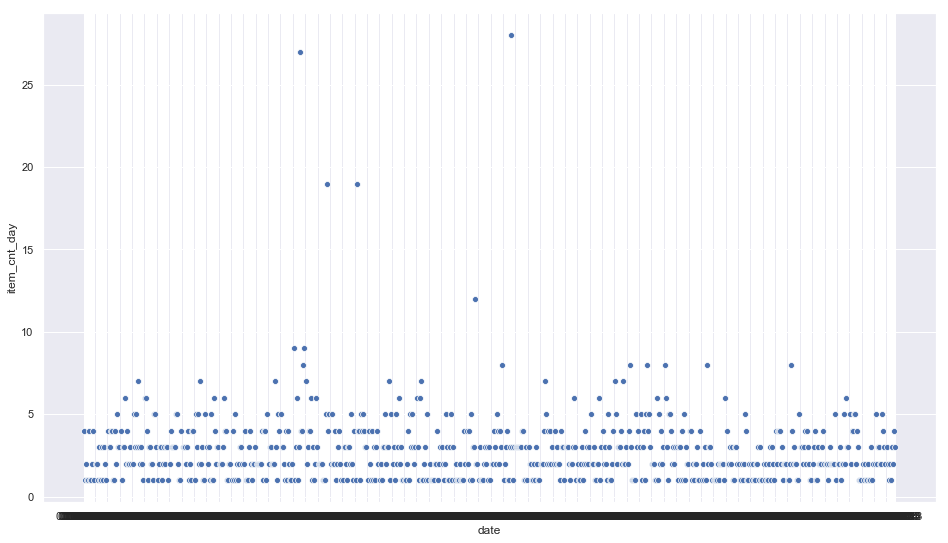

In [36]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day', 
                data=train_data[(train_data['shop_id'] == 55) & (train_data['item_id'] == 492)].sort_values(by=['date']),
                ax=ax)



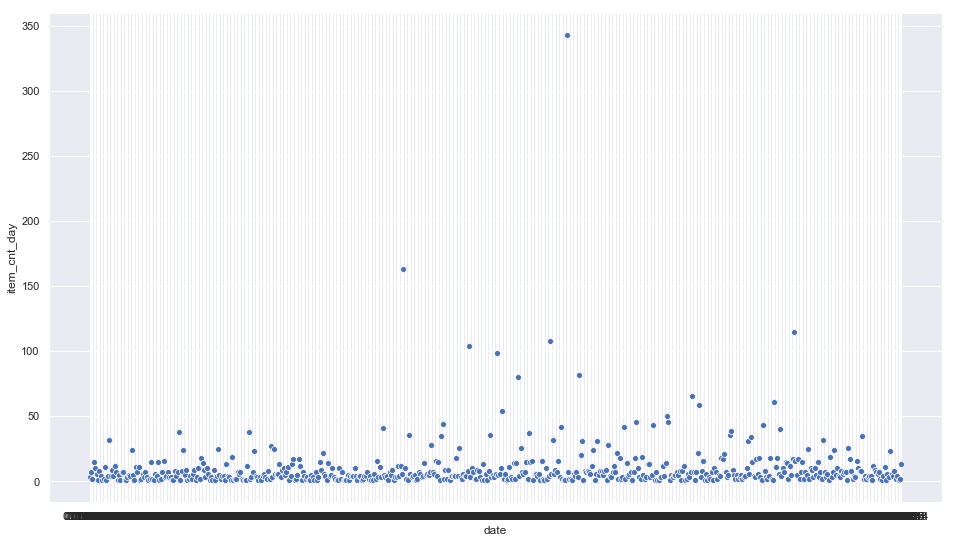

In [37]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day', 
                data=train_data[(train_data['shop_id'] == 12) & (train_data['item_id'] == 11370)].sort_values(by=['date']),
                ax=ax)



### Comments
From the data, it looks like a getting some sort of weighted average would give us the best guess on what is to happen in the future.

Since, we want to predict a monthly estimate in the end, let us start with the monthly average of the previous month alone as the first guess and start refining it further.